<a href="https://colab.research.google.com/github/sabumjung/DL-test/blob/master/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

In [5]:
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
#
model = Sequential()
model.add(SimpleRNN(units=units, dropout=dropout, input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
# plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

W0903 08:49:48.224991 139926808184704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0903 08:49:48.263843 139926808184704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0903 08:49:48.271911 139926808184704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0903 08:49:48.366637 139926808184704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0903 08:49:48.379088 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


In [26]:
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# train the network
simpleRNN_history=model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test, y_test),verbose=2).history
loss, acc= model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 0.0376 - acc: 0.9878 - val_loss: 0.0442 - val_acc: 0.9861
Epoch 2/10
 - 8s - loss: 0.0392 - acc: 0.9877 - val_loss: 0.0469 - val_acc: 0.9853
Epoch 3/10
 - 8s - loss: 0.0400 - acc: 0.9876 - val_loss: 0.0405 - val_acc: 0.9865
Epoch 4/10
 - 8s - loss: 0.0375 - acc: 0.9881 - val_loss: 0.0426 - val_acc: 0.9873
Epoch 5/10
 - 8s - loss: 0.0380 - acc: 0.9877 - val_loss: 0.0413 - val_acc: 0.9868
Epoch 6/10
 - 8s - loss: 0.0374 - acc: 0.9884 - val_loss: 0.0408 - val_acc: 0.9864
Epoch 7/10
 - 8s - loss: 0.0365 - acc: 0.9885 - val_loss: 0.0433 - val_acc: 0.9861
Epoch 8/10
 - 8s - loss: 0.0386 - acc: 0.9879 - val_loss: 0.0507 - val_acc: 0.9852
Epoch 9/10
 - 9s - loss: 0.0357 - acc: 0.9888 - val_loss: 0.0435 - val_acc: 0.9860
Epoch 10/10
 - 8s - loss: 0.0366 - acc: 0.9883 - val_loss: 0.0413 - val_acc: 0.9879
10000/10000 [==============================] - 1s 100us/step


ValueError: ignored

In [27]:
plt.plot(lstm_autoencoder_history['loss'], linewidth=2, label='Train')
plt.plot(lstm_autoencoder_history['val_loss'], linewidth=2, label='Valid')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

{'acc': [0.9850666666348775,
  0.9844,
  0.9842833333333333,
  0.9847833333015442,
  0.9847333333333333,
  0.9852833333015442,
  0.9853166666984559,
  0.9854833333015441,
  0.9863,
  0.9859499999682109],
 'loss': [0.04919200753470262,
  0.050809862506389615,
  0.05109646120170752,
  0.04917443167765935,
  0.04837892761155963,
  0.048340275900562606,
  0.04696044715543588,
  0.0459254223604997,
  0.0450532654568553,
  0.04567953025003274]}

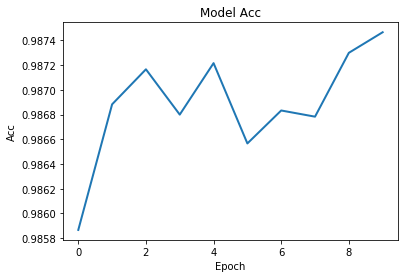

In [23]:
import matplotlib.pyplot as plt

plt.plot(simpleRNN_history['acc'], linewidth=2, label='acc')
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.show()

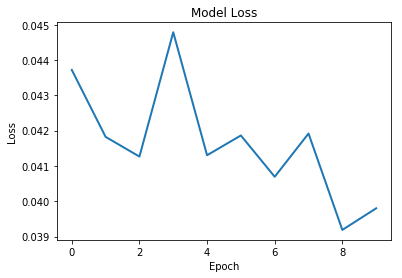

In [24]:
plt.plot(simpleRNN_history['loss'], linewidth=2, label='loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()